In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('C:/Users/dhira/Downloads/Dataset_SCA.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   10999 non-null  int64         
 1   Warehouse_block      10999 non-null  object        
 2   Mode_of_Shipment     10999 non-null  object        
 3   Customer_care_calls  10999 non-null  int64         
 4   Customer_rating      10999 non-null  int64         
 5   Cost_of_the_Product  10999 non-null  int64         
 6   Prior_purchases      10999 non-null  int64         
 7   Product_importance   10999 non-null  object        
 8   Gender               10999 non-null  object        
 9   Discount_offered%    10999 non-null  int64         
 10  Weight_in_gms        10999 non-null  int64         
 11  Reached.on.Time_Y.N  10999 non-null  int64         
 12  Final_Price          10999 non-null  float64       
 13  Delivery_Status      10999 non-

In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered%,Weight_in_gms,Reached.on.Time_Y.N,Final_Price,Delivery_Status,Product_Tier,Shipment_Date,Discount_Amount
0,7779,A,Ship,5,2,179,3,medium,M,5,4325,1,170.05,On Time,Medium,2023-07-25,8.95
1,4808,F,Flight,6,3,254,4,low,M,6,1335,0,238.76,Delayed,Low,2023-02-04,15.24
2,606,F,Ship,4,4,166,5,low,F,54,1203,1,76.36,On Time,Low,2023-08-03,89.64
3,953,C,Road,3,5,188,3,high,F,9,3206,1,171.08,On Time,High,2023-11-28,16.92
4,8171,C,Ship,3,3,179,2,low,M,5,5058,0,170.05,Delayed,Low,2023-06-01,8.95


In [5]:
print(df['Product_Tier'].unique())
print(df['Warehouse_block'].unique())
print(df['Mode_of_Shipment'].unique())
print(df['Customer_care_calls'].value_counts())

['Medium' 'Low' 'High']
['A' 'F' 'C' 'D' 'B']
['Ship' 'Flight' 'Road']
Customer_care_calls
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: count, dtype: int64


In [6]:
df.rename(columns={'Reached.on.Time_Y.N': 'On_time_flag'}, inplace=True)

In [7]:
# Step 3.2: Calculate key performance metrics using the renamed column 'On_time_flag'

total_orders = df.shape[0]
on_time_deliveries = df['On_time_flag'].sum()
on_time_delivery_rate = on_time_deliveries / total_orders

avg_customer_rating = df['Customer_rating'].mean()
total_sales = df['Final_Price'].sum()
avg_discount = df['Discount_offered%'].mean()

# Display results
kpi_results = {
    "Total Orders": total_orders,
    "On-Time Delivery Rate (%)": round(on_time_delivery_rate * 100, 2),
    "Average Customer Rating": round(avg_customer_rating, 2),
    "Total Sales (₹)": round(total_sales, 2),
    "Average Discount (%)": round(avg_discount, 2)
}

print(kpi_results)


{'Total Orders': 10999, 'On-Time Delivery Rate (%)': 59.67, 'Average Customer Rating': 2.99, 'Total Sales (₹)': 2014620.38, 'Average Discount (%)': 13.37}


In [8]:
print(df.columns.tolist())

['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered%', 'Weight_in_gms', 'On_time_flag', 'Final_Price', 'Delivery_Status', 'Product_Tier', 'Shipment_Date', 'Discount_Amount']


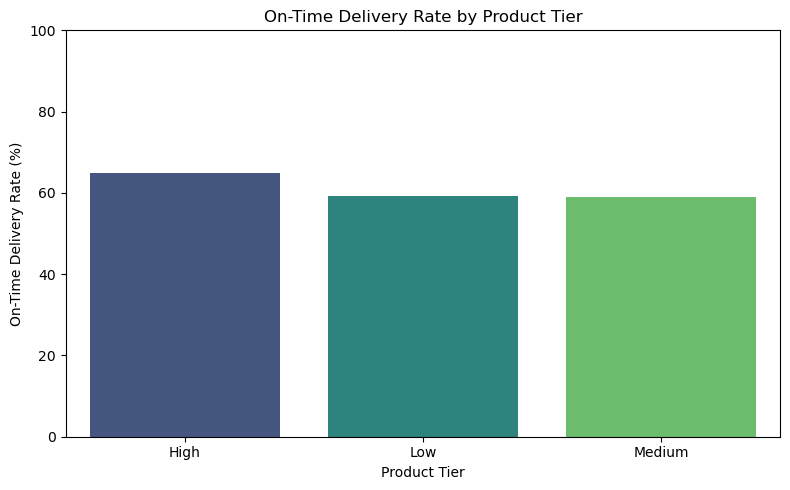

In [9]:
# 1. On-Time Delivery Rate by Product Tier

plt.figure(figsize=(8, 5))
delivery_by_tier = df.groupby('Product_Tier')['On_time_flag'].mean().reset_index()
delivery_by_tier['On_time_flag'] *= 100  # Convert to %
sns.barplot(data=delivery_by_tier, x='Product_Tier', y='On_time_flag', palette='viridis')

plt.title('On-Time Delivery Rate by Product Tier')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xlabel('Product Tier')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

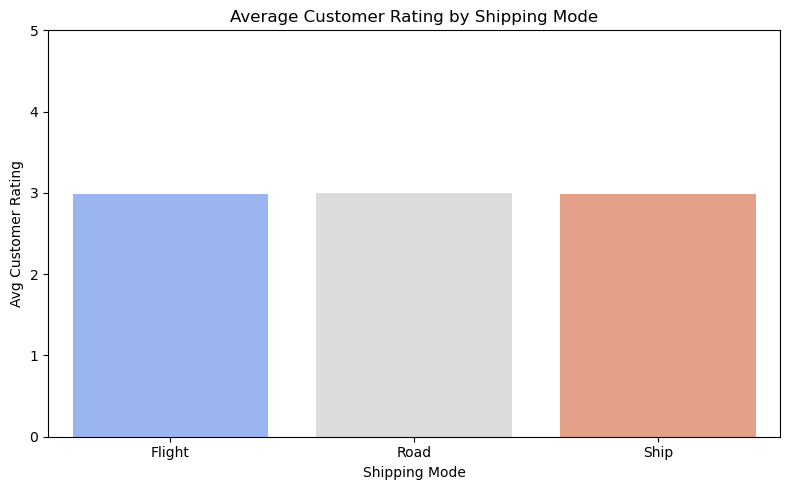

In [10]:
# 2. Customer Rating by Shipping Mode

plt.figure(figsize=(8, 5))
rating_by_mode = df.groupby('Mode_of_Shipment')['Customer_rating'].mean().reset_index()
sns.barplot(data=rating_by_mode, x='Mode_of_Shipment', y='Customer_rating', palette='coolwarm')

plt.title('Average Customer Rating by Shipping Mode')
plt.ylabel('Avg Customer Rating')
plt.xlabel('Shipping Mode')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


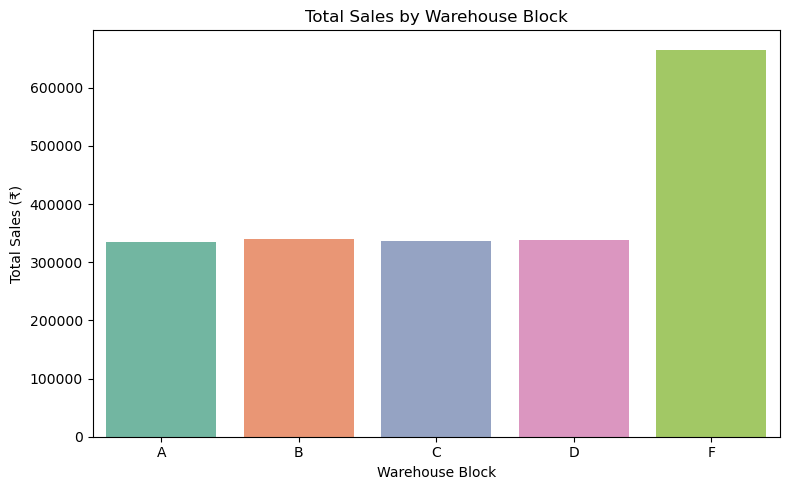

In [11]:
# 3. Total Sales by Warehouse Block

plt.figure(figsize=(8, 5))
sales_by_warehouse = df.groupby('Warehouse_block')['Final_Price'].sum().reset_index()
sns.barplot(data=sales_by_warehouse, x='Warehouse_block', y='Final_Price', palette='Set2')

plt.title('Total Sales by Warehouse Block')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Warehouse Block')
plt.tight_layout()
plt.show()


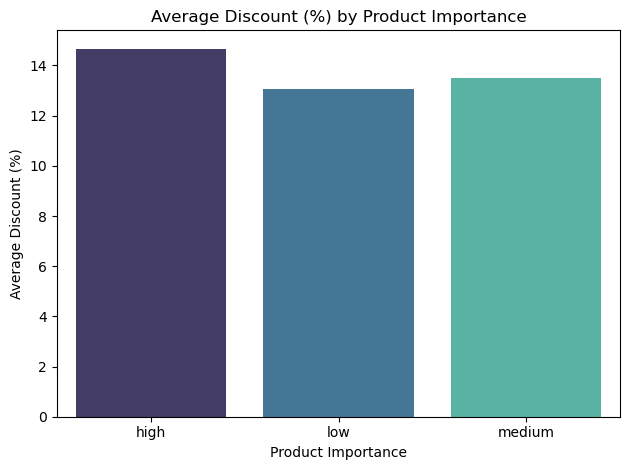

In [12]:
# plt.figure(figsize=(8, 5))
discount_by_importance = df.groupby('Product_importance')['Discount_offered%'].mean().reset_index()
sns.barplot(data=discount_by_importance, x='Product_importance', y='Discount_offered%', palette='mako')

plt.title('Average Discount (%) by Product Importance')
plt.ylabel('Average Discount (%)')
plt.xlabel('Product Importance')
plt.tight_layout()
plt.show()

In [13]:
# Convert Shipment_Date to datetime format
df['Shipment_Date'] = pd.to_datetime(df['Shipment_Date'], errors='coerce')

In [14]:
# Extract shipment month for trend analysis
df['Shipment_Month'] = df['Shipment_Date'].dt.to_period('M').astype(str)

In [15]:
# 1. Monthly Shipment Trend
monthly_trend = df.groupby('Shipment_Month')['ID'].count().reset_index()
monthly_trend.columns = ['Shipment_Month', 'Total_Shipments']

# 2. Pivot Table for Heatmap: On-Time Rate by Shipment Mode and Product Tier
heatmap_data = df.pivot_table(
    values='On_time_flag',
    index='Mode_of_Shipment',
    columns='Product_Tier',
    aggfunc='mean'
) * 100  # Convert to percentage

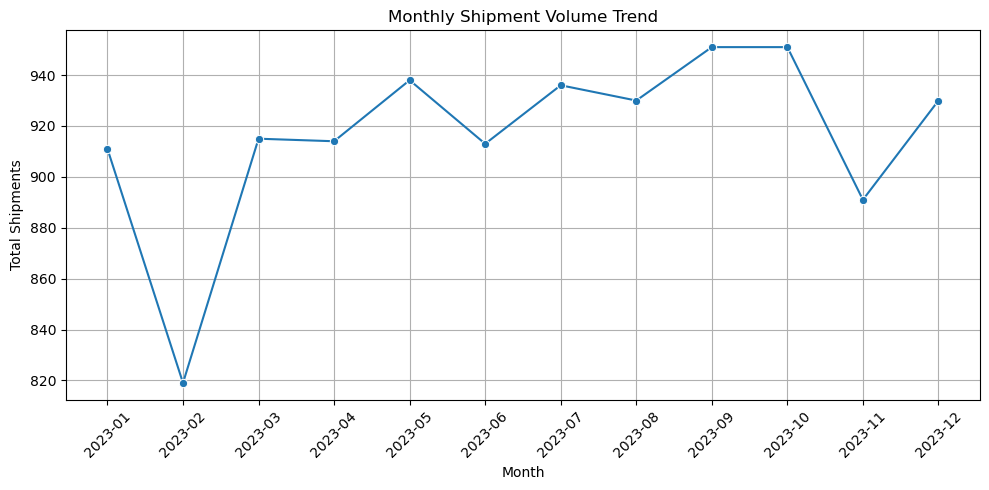

In [16]:
# Plot 1: Monthly Shipment Trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='Shipment_Month', y='Total_Shipments', marker='o')
plt.title('Monthly Shipment Volume Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Shipments')
plt.xlabel('Month')
plt.tight_layout()
plt.grid(True)
plt.show()

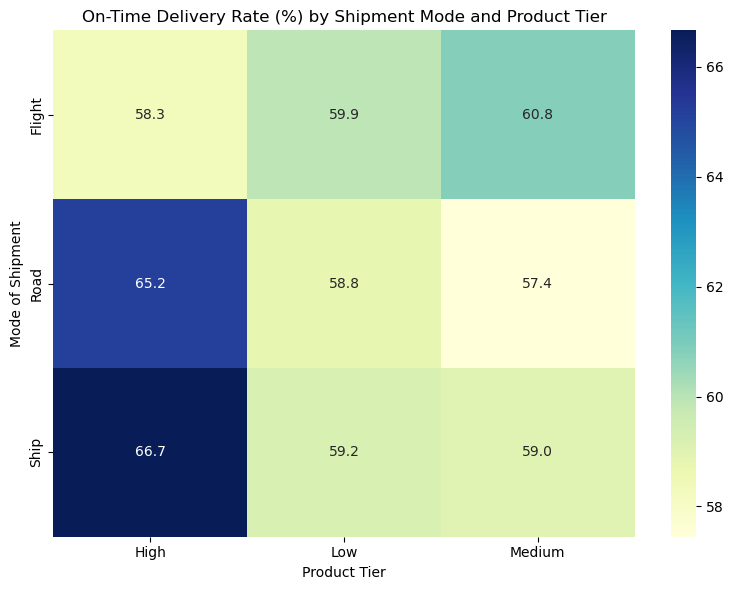

In [17]:
# Plot 2: Heatmap of On-Time Delivery Rate by Shipment Mode and Product Tier
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('On-Time Delivery Rate (%) by Shipment Mode and Product Tier')
plt.xlabel('Product Tier')
plt.ylabel('Mode of Shipment')
plt.tight_layout()
plt.show()

#### **Deeper Exploratory Data Analysis & Visualizations**

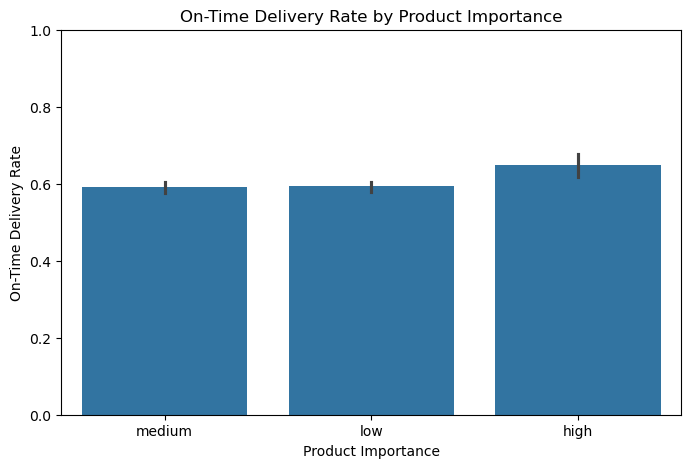

In [18]:
# Product Importance vs On-Time Delivery

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Product_importance', y='On_time_flag', estimator='mean')
plt.title('On-Time Delivery Rate by Product Importance')
plt.ylabel('On-Time Delivery Rate')
plt.xlabel('Product Importance')
plt.ylim(0, 1)
plt.show()

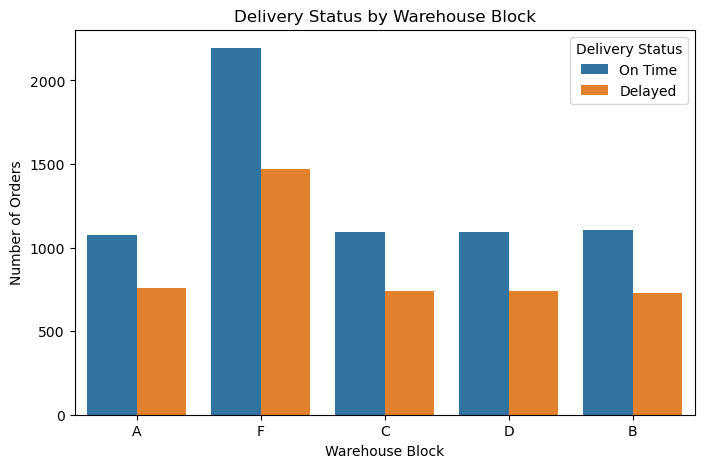

In [19]:
# Delivery Status by Warehouse Block
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Warehouse_block', hue='Delivery_Status')
plt.title('Delivery Status by Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Number of Orders')
plt.legend(title='Delivery Status')
plt.show()

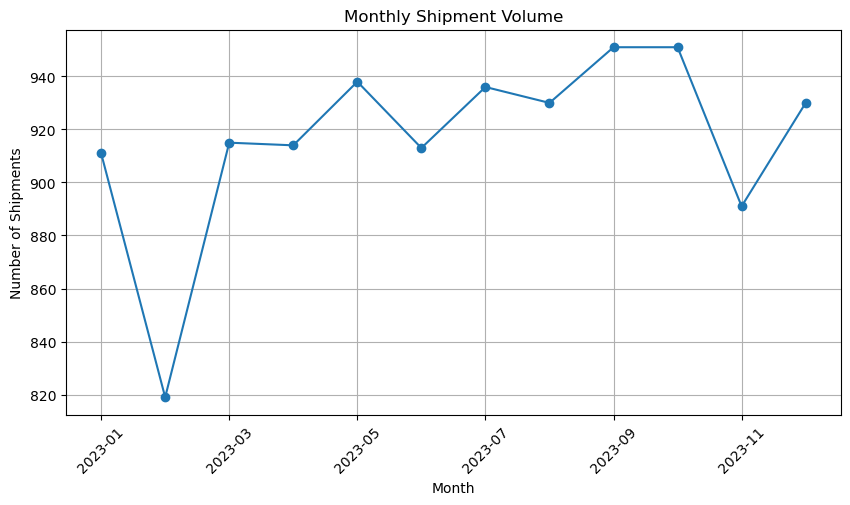

In [20]:
#  Monthly Shipment Trend

monthly_shipments = df.groupby('Shipment_Month').size()

plt.figure(figsize=(10, 5))
monthly_shipments.plot(kind='line', marker='o')
plt.title('Monthly Shipment Volume')
plt.xlabel('Month')
plt.ylabel('Number of Shipments')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [21]:
# Extract Day of the Week from Shipment_Date

# Ensure the column is datetime type
df['Shipment_Date'] = pd.to_datetime(df['Shipment_Date'], errors='coerce')

# Extract weekday name (Monday, Tuesday, ...)
df['Shipment_Weekday'] = df['Shipment_Date'].dt.day_name()

In [22]:
# Create Is_Weekend_Shipment (1 if weekend, else 0)

# Mark Saturday and Sunday as weekend
df['Is_Weekend_Shipment'] = df['Shipment_Weekday'].isin(['Saturday', 'Sunday']).astype(int)

In [23]:
# Testing
df[['Shipment_Date', 'Shipment_Weekday', 'Is_Weekend_Shipment']].head()

,Shipment_Date,Shipment_Weekday,Is_Weekend_Shipment
0,2023-07-25,Tuesday,0
1,2023-02-04,Saturday,1
2,2023-08-03,Thursday,0
3,2023-11-28,Tuesday,0
4,2023-06-01,Thursday,0


In [24]:
# Step 1.3: Create Expected Shipping Days based on Mode of Shipment

# Define a dictionary to map each mode to its expected shipping days.
# (You can adjust these values based on your domain knowledge.)
expected_shipping_mapping = {
    'Flight': 2,  # Fastest
    'Road': 5,    # Moderate
    'Ship': 7     # Slowest
}

# Create a new column 'Expected_Shipping_Days' by mapping the values from the Mode_of_Shipment column.
df['Expected_Shipping_Days'] = df['Mode_of_Shipment'].map(expected_shipping_mapping)

# Check the result for the first few rows
print(df[['Mode_of_Shipment', 'Expected_Shipping_Days']].head())

  Mode_of_Shipment  Expected_Shipping_Days
0             Ship                       7
1           Flight                       2
2             Ship                       7
3             Road                       5
4             Ship                       7


In [25]:
# Step 2: Customer & Product Behavioral Features

# 2.1: Create a feature for Loyal Customer (e.g., if Prior_purchases >= 5, flag as 1, else 0)
df['Is_Loyal_Customer'] = (df['Prior_purchases'] >= 5).astype(int)

# 2.2: Create a feature for High Value Order (compare Final_Price with the overall average)
avg_final_price = df['Final_Price'].mean()
df['Is_High_Value_Order'] = (df['Final_Price'] > avg_final_price).astype(int)

# 2.3: Calculate Effective Discount (in currency) as: (Discount_offered% * Cost_of_the_Product) / 100
df['Effective_Discount'] = (df['Discount_offered%'] * df['Cost_of_the_Product']) / 100

# 2.4: Calculate Price per Gram (Final_Price divided by Weight_in_gms)
df['Price_per_Gram'] = df['Final_Price'] / df['Weight_in_gms']

# Display the first few rows of the new features
print(df[['Is_Loyal_Customer', 'Is_High_Value_Order', 'Effective_Discount', 'Price_per_Gram']].head())

   Is_Loyal_Customer  Is_High_Value_Order  Effective_Discount  Price_per_Gram
0                  0                    0                8.95        0.039318
1                  0                    1               15.24        0.178846
2                  1                    0               89.64        0.063475
3                  0                    0               16.92        0.053362
4                  0                    0                8.95        0.033620


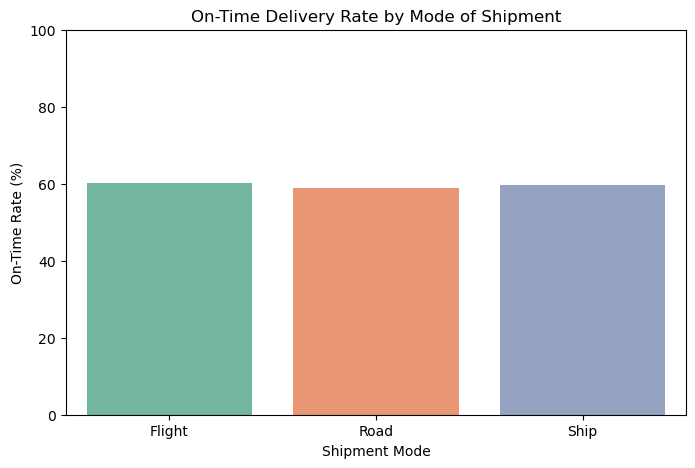

In [26]:
#Insight: Helps understand which shipping method is most reliable.


# On-Time Delivery Rate by Mode of Shipment

# Calculate on-time delivery rate (%) by mode of shipment
shipment_performance = df.groupby('Mode_of_Shipment')['On_time_flag'].mean().reset_index()
shipment_performance['On_time_rate_%'] = shipment_performance['On_time_flag'] * 100

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=shipment_performance, x='Mode_of_Shipment', y='On_time_rate_%', palette='Set2')
plt.title('On-Time Delivery Rate by Mode of Shipment')
plt.ylabel('On-Time Rate (%)')
plt.xlabel('Shipment Mode')
plt.ylim(0, 100)
plt.show()

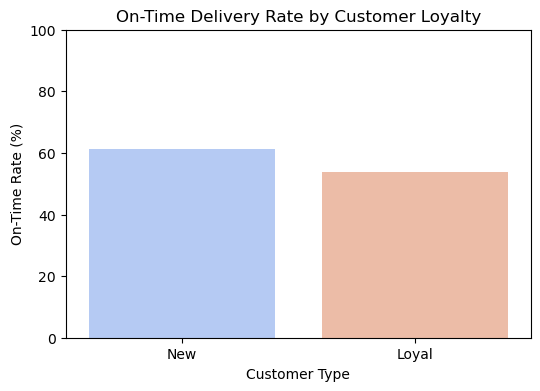

In [27]:
#  Insight: See whether repeat customers get better delivery treatment.

#  On-Time Delivery by Customer Type (Loyal vs Non-loyal)

# Compare on-time delivery rate between loyal and non-loyal customers
loyalty_performance = df.groupby('Is_Loyal_Customer')['On_time_flag'].mean().reset_index()
loyalty_performance['On_time_rate_%'] = loyalty_performance['On_time_flag'] * 100
loyalty_performance['Customer Type'] = loyalty_performance['Is_Loyal_Customer'].map({0: 'New', 1: 'Loyal'})

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=loyalty_performance, x='Customer Type', y='On_time_rate_%', palette='coolwarm')
plt.title('On-Time Delivery Rate by Customer Loyalty')
plt.ylabel('On-Time Rate (%)')
plt.ylim(0, 100)
plt.show()

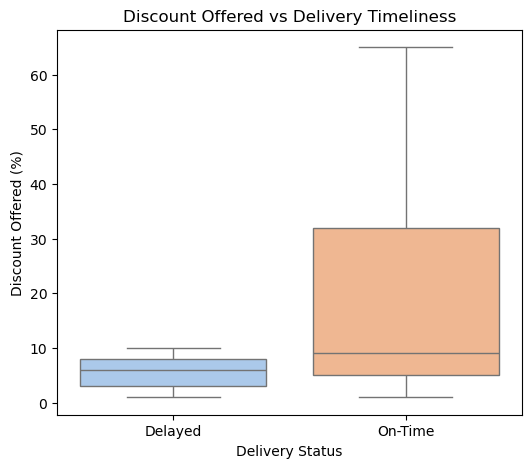

In [28]:
#Insight: Are higher discounts causing more delivery delays?

# Correlation Between Discount Offered and On-Time Delivery

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='On_time_flag', y='Discount_offered%', palette='pastel')
plt.xticks([0,1], ['Delayed', 'On-Time'])
plt.title('Discount Offered vs Delivery Timeliness')
plt.xlabel('Delivery Status')
plt.ylabel('Discount Offered (%)')
plt.show()

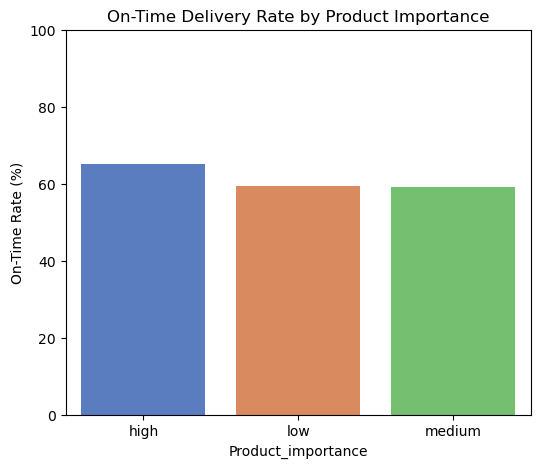

In [29]:
# Insight: Check if "High importance" products are prioritized better.

# Does Product Importance Impact Timeliness?

importance_group = df.groupby('Product_importance')['On_time_flag'].mean().reset_index()
importance_group['On_time_rate_%'] = importance_group['On_time_flag'] * 100

# Plot
plt.figure(figsize=(6,5))
sns.barplot(data=importance_group, x='Product_importance', y='On_time_rate_%', palette='muted')
plt.title('On-Time Delivery Rate by Product Importance')
plt.ylabel('On-Time Rate (%)')
plt.ylim(0, 100)
plt.show()

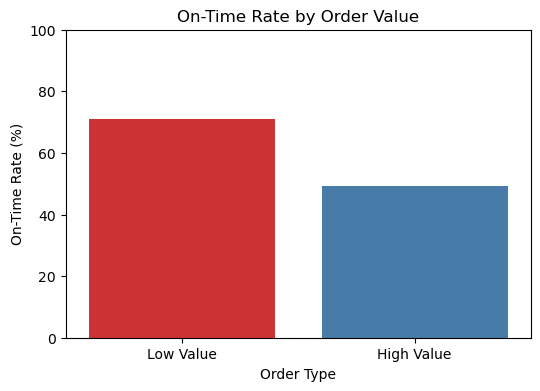

In [30]:
# Insight: Analyze if expensive orders are delivered more reliably.

#  High Value Orders vs Timeliness

value_group = df.groupby('Is_High_Value_Order')['On_time_flag'].mean().reset_index()
value_group['On_time_rate_%'] = value_group['On_time_flag'] * 100
value_group['Order Type'] = value_group['Is_High_Value_Order'].map({0: 'Low Value', 1: 'High Value'})

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=value_group, x='Order Type', y='On_time_rate_%', palette='Set1')
plt.title('On-Time Rate by Order Value')
plt.ylabel('On-Time Rate (%)')
plt.ylim(0, 100)
plt.show()

 | Analysis Area          | Insight Gained                                                         |
| ---------------------- | ---------------------------------------------------------------------- |
| **Mode of Shipment**   | Identified which shipping method performs best in on-time delivery.    |
| **Customer Loyalty**   | Compared delivery performance for loyal vs new customers.              |
| **Discounts**          | Explored whether higher discounts are correlated with delivery delays. |
| **Product Importance** | Evaluated if high-priority products get delivered faster.              |
| **Order Value**        | Checked whether expensive orders are treated with priority.            |


Prediction Model for On-Time Delivery (Binary Classification)

Step 1: Define the Goal
We want to predict whether a shipment will be delivered on time (1) or delayed (0) based on features like shipment mode, cost, weight, discount, etc.

Step 2: Preprocess Data for Modeling
We’ll:

Select relevant features

Encode categorical variables

Scale numerical values

Split into training and testing sets

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Select features and target
features = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
            'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender',
            'Discount_offered%', 'Weight_in_gms']

X = df[features]
y = df['On_time_flag']  # already binary (1 = on time)

# Encode categorical features
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

 Step 3: Build and Evaluate Models
Let’s try 2 models:

Logistic Regression (simple baseline)

Random Forest (more powerful)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("🔹 Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\n🔹 Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

🔹 Logistic Regression
              precision    recall  f1-score   support

           0       0.54      0.57      0.55       874
           1       0.70      0.68      0.69      1326

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200

Accuracy: 0.6354545454545455

🔹 Random Forest
              precision    recall  f1-score   support

           0       0.56      0.72      0.63       874
           1       0.77      0.63      0.70      1326

    accuracy                           0.67      2200
   macro avg       0.67      0.68      0.66      2200
weighted avg       0.69      0.67      0.67      2200

Accuracy: 0.6668181818181819


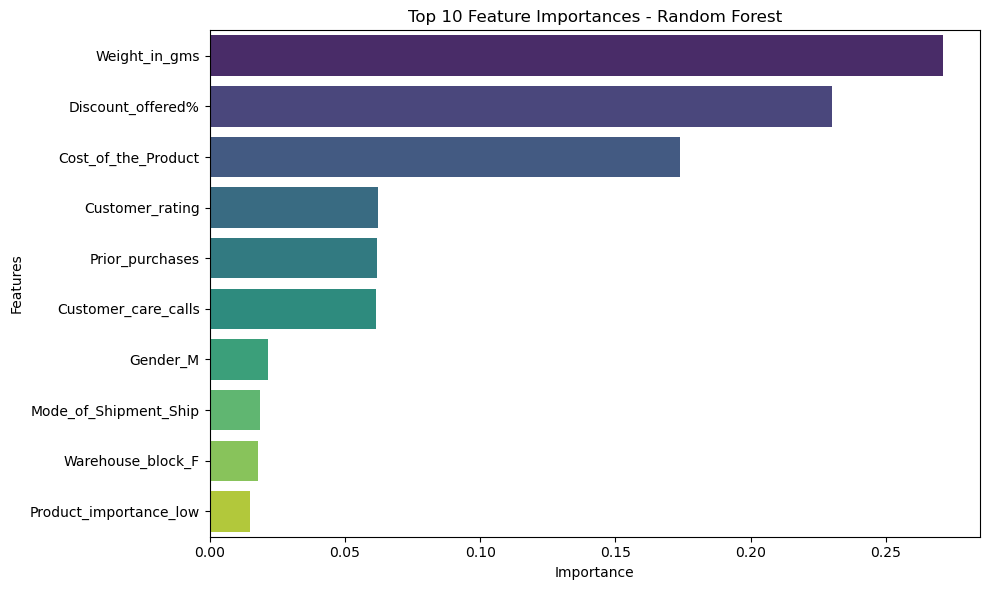

In [33]:
# Get feature importance
importances = rf.feature_importances_
feature_names = X_encoded.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10], palette="viridis")
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [42]:
warehouse_perf = df.groupby('Warehouse_block')['On_time_flag'].mean().reset_index(name='On_Time_Rate')
warehouse_perf['On_Time_Rate'] = (warehouse_perf['On_Time_Rate'] * 100).round(2)
warehouse_perf.to_csv('warehouse_performance.csv', index=False)

In [45]:
category_delay = df[df['On_time_flag'] == 0].groupby('Product_importance').size().reset_index(name='Late_Deliveries')
category_delay.to_csv('category_delay.csv', index=False)

In [47]:
on_time_month = df.groupby('Shipment_Month')['On_time_flag'].mean().reset_index(name='On_Time_Delivery_Rate')
on_time_month['On_Time_Delivery_Rate'] = (on_time_month['On_Time_Delivery_Rate'] * 100).round(2)
on_time_month.to_csv('on_time_delivery_by_month.csv', index=False)

In [49]:
monthly_shipments = df.groupby('Shipment_Month').size().reset_index(name='Total_Shipments')
monthly_shipments.to_csv('monthly_shipments.csv', index=False)